In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [137]:
select_year = [0]
select_month = [0]

def set_date(year,month):
    database = pd.read_csv('data.csv')
    select_year[0] = int(year)
    select_month[0] = int(month)

def get_database():
    return database
def get_date():
    return select_year[0],select_month[0]

def setting_database(label):
    global database
    database = get_datebase()
    year, month = get_date()
    database_subset = database[database.Year == year]
    database_subset = database_subset[database_subset.Month == month]
    if database_subset.empty():
        label.setText("No Data")
    else:
        data = database_subset.groupby(['Day']).mean().reset_index()
        if len(data) == 1 :
            day = data['Day']
            x = np.intersect1d(np.arange(1,32),day)
            y = data['Distance']
            plt.bar(x,y)
            plt.xlabel("Days")
            plt.ylabel("Distance")
            plt.title("Average distance of smartphone use in a day")
            plt.savefig('analysis_image.png')
            label.setPixmap(QtGui.QPixmap('analysis_image.png.'))
        else:
            day = data['Day']
            x = np.intersect1d(np.arange(1,32),day)
            y = data['Distance']
            plt.plot(x,y,label = 'Distance')
            plt.xlabel("Days")
            plt.ylabel("Distance")
            plt.axis([1,31,0,150])
            plt.title("Average distance of smartphone use in a month")
            plt.grid(color = 'gray', linestyle = '-', linewidth = 0.5)
            plt.legend(loc = 9)
            plt.savefig('analysis_image.png')
            label.setPixmap(QtGui.QPixmap('analysis_image.png.'))
#             plt.show()

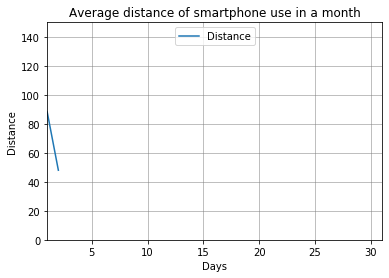

In [138]:
if __name__ == '__main__':
    set_date(2019,10)
    setting_database()